# Model Test ve Değerlendirme

Bu notebook, daha önceki eğitim aşamasında kaydedilen **LightGBM**, **SVM** ve **MLP** modellerini yükleyerek, ayrılmış olan **test verileri** üzerinde performanslarını ölçer.

Amaç, modellerin daha önce hiç görmediği veriler üzerindeki genelleme yeteneğini ve nihai başarımını doğrulamaktır. İşlem adımları:

1.  Gerekli kütüphaneler yüklenir.
2.  Değerlendirme fonksiyonu tanımlanır.
3.  Her bir veri seti (`CREMA-D`, `EMO-DB`) için kaydedilmiş modeller ve test verileri (`.pkl`, `.npy`) yüklenir.
4.  Modellerin test performansı (Accuracy, F1-Score, Confusion Matrix vb.) hesaplanır ve görselleştirilir.
5.  Tüm modellerin test sonuçları toplu olarak karşılaştırılır.

In [16]:
#lokalde test edilecekse burası kapatılmalı
from google.colab import drive
drive.mount('/content/drive')

import os
project_path = '/content/drive/MyDrive/AudioEmotionDetection'
os.chdir(project_path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AudioEmotionDetection


## 1. Kütüphanelerin Yüklenmesi ve Ayarlar

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import joblib
import warnings

# Uyarıları gizle
warnings.filterwarnings('ignore')

# Grafikleri notebook içinde göstermek için
%matplotlib inline

## 2. Model Değerlendirme Fonksiyonu

Bu fonksiyon, bir modeli, test verisini ve etiketleri alarak kapsamlı bir performans raporu ve karışıklık matrisi oluşturur.

In [2]:
def evaluate_model(model, X_test_data, y_test_data, model_name, dataset_name, le):
    """Modeli test verisi üzerinde değerlendirir ve sonuçları görselleştirir."""
    # Tahminleri yap
    y_pred = model.predict(X_test_data)

    # Metrikleri hesapla
    accuracy = accuracy_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred, average='weighted')
    precision = precision_score(y_test_data, y_pred, average='weighted')
    recall = recall_score(y_test_data, y_pred, average='weighted')
    cm = confusion_matrix(y_test_data, y_pred)

    # Sonuçları yazdır
    print(f'--- {model_name} ({dataset_name}) TEST SONUÇLARI ---')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'\nSınıf Bazlı Performans:\n{classification_report(y_test_data, y_pred, target_names=le.classes_)}')

    # Karışıklık Matrisini çizdir
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{model_name} ({dataset_name}) Test Karışıklık Matrisi')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.show()

    return accuracy, f1, precision, recall

## 3. Test Verisi ile Modellerin Değerlendirilmesi

Önceki notebook'ta kaydedilen `X_test_selected`, `y_test`, `label_encoder` ve eğitilmiş modeller (`lgbm`, `svm`, `mlp`) diskten okunur ve `evaluate_model` fonksiyonu kullanılarak her bir modelin performansı test edilir.


==================== CREMA-D TEST AŞAMASI ====================
--- LightGBM (CREMA-D) TEST SONUÇLARI ---
Accuracy: 0.3786
Precision: 0.3732
Recall: 0.3786
F1-Score: 0.3715

Sınıf Bazlı Performans:
              precision    recall  f1-score   support

       Angry       0.60      0.62      0.61       127
     Disgust       0.21      0.20      0.21        74
        Fear       0.29      0.17      0.22       127
       Happy       0.34      0.32      0.33       128
     Neutral       0.30      0.42      0.35       109
         Sad       0.42      0.46      0.44       127

    accuracy                           0.38       692
   macro avg       0.36      0.37      0.36       692
weighted avg       0.37      0.38      0.37       692



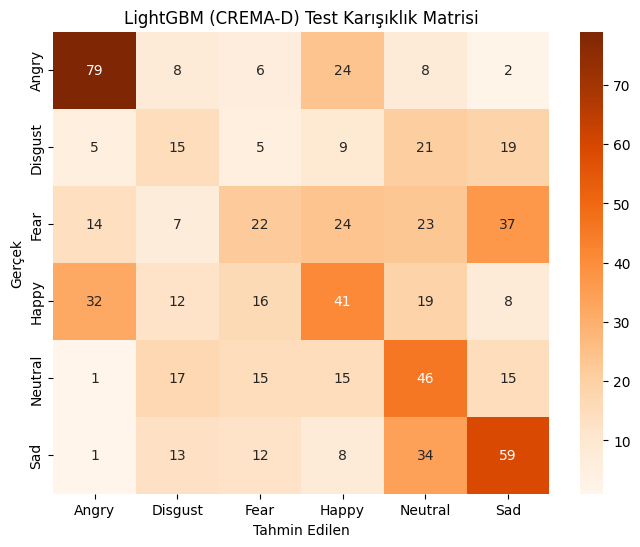

--- SVM (CREMA-D) TEST SONUÇLARI ---
Accuracy: 0.4046
Precision: 0.3913
Recall: 0.4046
F1-Score: 0.3928

Sınıf Bazlı Performans:
              precision    recall  f1-score   support

       Angry       0.48      0.71      0.57       127
     Disgust       0.17      0.14      0.15        74
        Fear       0.36      0.33      0.34       127
       Happy       0.35      0.30      0.32       128
     Neutral       0.41      0.37      0.39       109
         Sad       0.49      0.47      0.48       127

    accuracy                           0.40       692
   macro avg       0.38      0.39      0.38       692
weighted avg       0.39      0.40      0.39       692



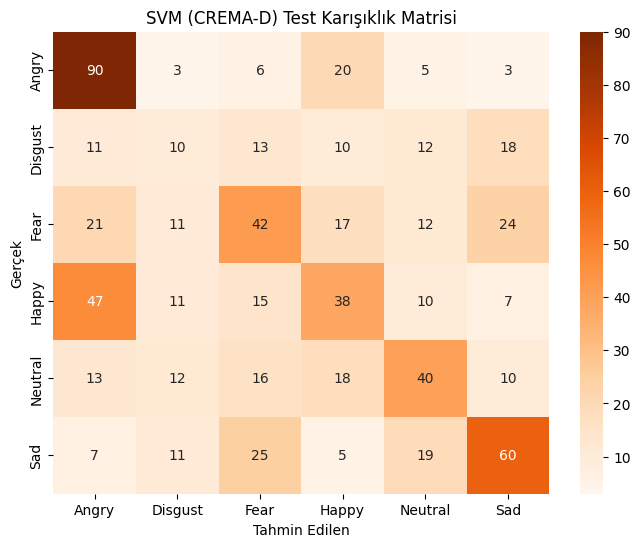

--- MLP (CREMA-D) TEST SONUÇLARI ---
Accuracy: 0.4061
Precision: 0.4063
Recall: 0.4061
F1-Score: 0.4035

Sınıf Bazlı Performans:
              precision    recall  f1-score   support

       Angry       0.62      0.68      0.65       127
     Disgust       0.15      0.15      0.15        74
        Fear       0.40      0.31      0.35       127
       Happy       0.33      0.33      0.33       128
     Neutral       0.34      0.45      0.39       109
         Sad       0.48      0.42      0.45       127

    accuracy                           0.41       692
   macro avg       0.39      0.39      0.39       692
weighted avg       0.41      0.41      0.40       692



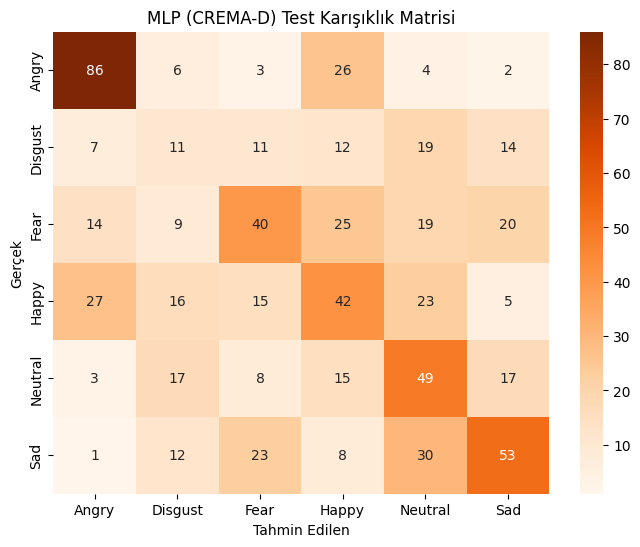


==================== CREMA-D_AUG TEST AŞAMASI ====================
--- LightGBM (CREMA-D_AUG) TEST SONUÇLARI ---
Accuracy: 0.5025
Precision: 0.4942
Recall: 0.5025
F1-Score: 0.4900

Sınıf Bazlı Performans:
              precision    recall  f1-score   support

       Angry       0.60      0.77      0.67       509
     Disgust       0.40      0.34      0.36       296
        Fear       0.47      0.28      0.36       509
       Happy       0.47      0.40      0.44       509
     Neutral       0.45      0.55      0.50       435
         Sad       0.52      0.61      0.56       508

    accuracy                           0.50      2766
   macro avg       0.49      0.49      0.48      2766
weighted avg       0.49      0.50      0.49      2766



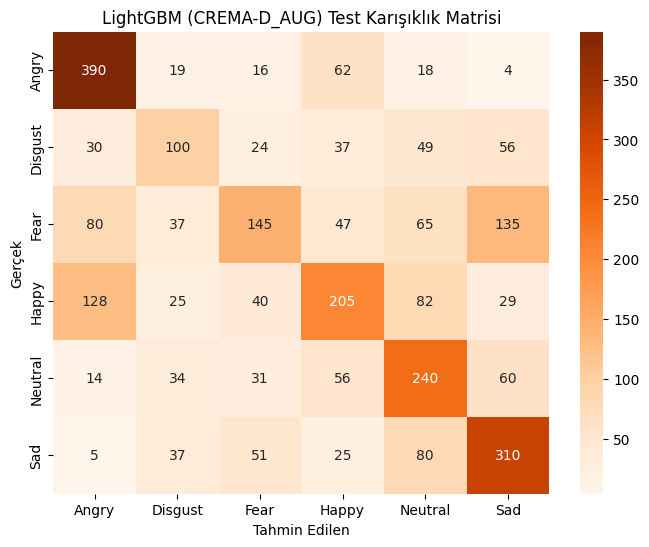

--- SVM (CREMA-D_AUG) TEST SONUÇLARI ---
Accuracy: 0.6500
Precision: 0.6471
Recall: 0.6500
F1-Score: 0.6471

Sınıf Bazlı Performans:
              precision    recall  f1-score   support

       Angry       0.71      0.84      0.77       509
     Disgust       0.58      0.53      0.55       296
        Fear       0.63      0.57      0.60       509
       Happy       0.63      0.63      0.63       509
     Neutral       0.65      0.63      0.64       435
         Sad       0.65      0.65      0.65       508

    accuracy                           0.65      2766
   macro avg       0.64      0.64      0.64      2766
weighted avg       0.65      0.65      0.65      2766



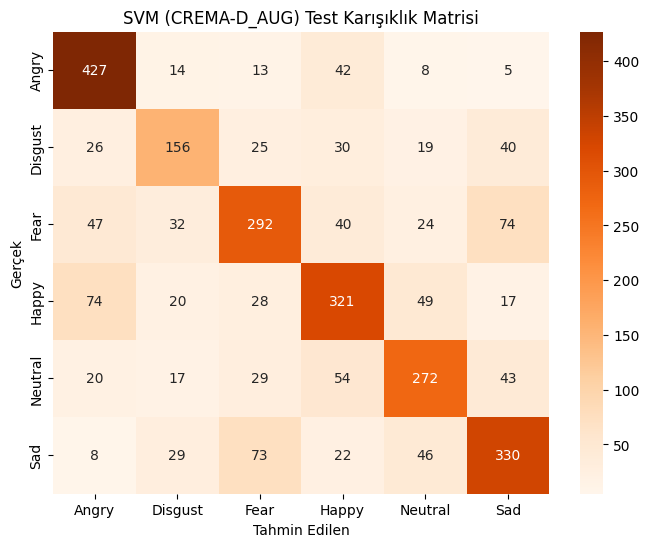

--- MLP (CREMA-D_AUG) TEST SONUÇLARI ---
Accuracy: 0.5054
Precision: 0.5043
Recall: 0.5054
F1-Score: 0.5020

Sınıf Bazlı Performans:
              precision    recall  f1-score   support

       Angry       0.62      0.70      0.66       509
     Disgust       0.37      0.45      0.40       296
        Fear       0.47      0.34      0.40       509
       Happy       0.48      0.46      0.47       509
     Neutral       0.49      0.53      0.51       435
         Sad       0.54      0.54      0.54       508

    accuracy                           0.51      2766
   macro avg       0.49      0.50      0.50      2766
weighted avg       0.50      0.51      0.50      2766



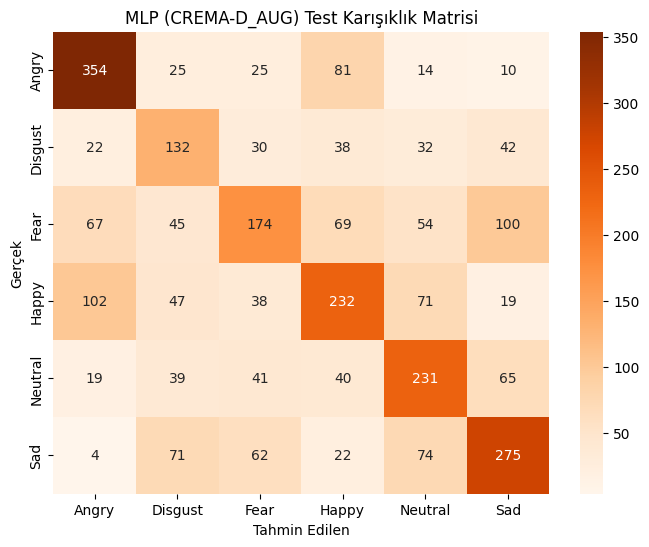


==================== EMO-DB TEST AŞAMASI ====================
--- LightGBM (EMO-DB) TEST SONUÇLARI ---
Accuracy: 0.3600
Precision: 0.3524
Recall: 0.3600
F1-Score: 0.3509

Sınıf Bazlı Performans:
              precision    recall  f1-score   support

       Angry       0.36      0.35      0.35       350
     Disgust       0.33      0.22      0.26       339
        Fear       0.33      0.31      0.32       350
       Happy       0.39      0.46      0.42       350
     Neutral       0.40      0.51      0.45       350
         Sad       0.37      0.48      0.42       350
   Surprised       0.29      0.20      0.24       344

    accuracy                           0.36      2433
   macro avg       0.35      0.36      0.35      2433
weighted avg       0.35      0.36      0.35      2433



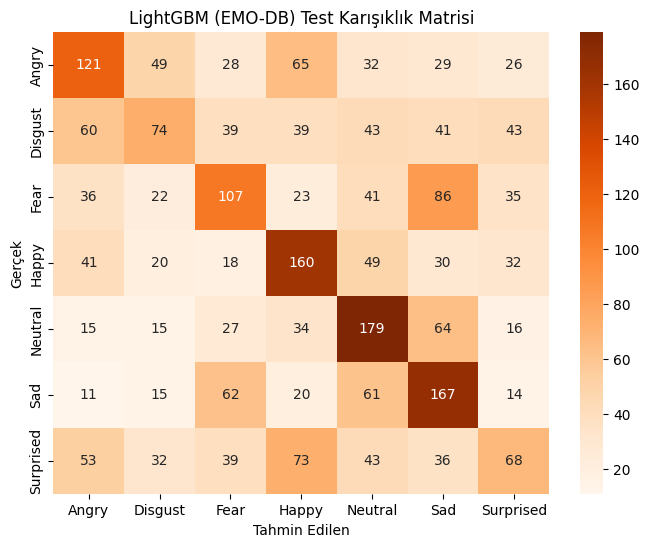

--- SVM (EMO-DB) TEST SONUÇLARI ---
Accuracy: 0.3757
Precision: 0.3692
Recall: 0.3757
F1-Score: 0.3705

Sınıf Bazlı Performans:
              precision    recall  f1-score   support

       Angry       0.34      0.40      0.37       350
     Disgust       0.31      0.30      0.31       339
        Fear       0.33      0.33      0.33       350
       Happy       0.42      0.46      0.44       350
     Neutral       0.47      0.50      0.48       350
         Sad       0.44      0.45      0.44       350
   Surprised       0.27      0.18      0.21       344

    accuracy                           0.38      2433
   macro avg       0.37      0.37      0.37      2433
weighted avg       0.37      0.38      0.37      2433



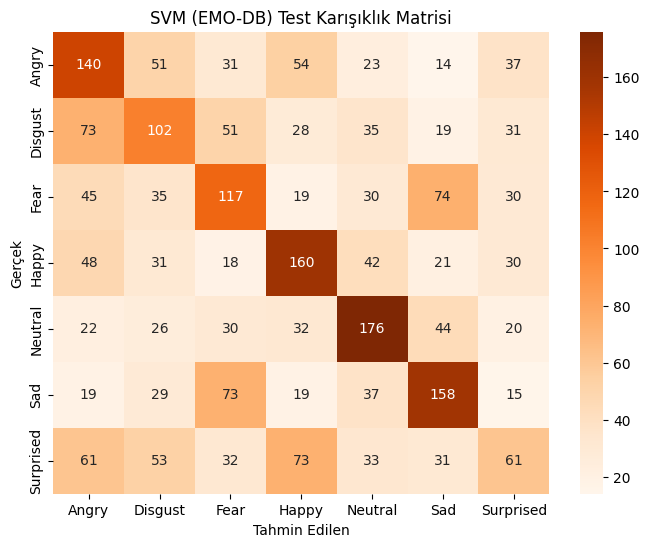

--- MLP (EMO-DB) TEST SONUÇLARI ---
Accuracy: 0.3736
Precision: 0.3662
Recall: 0.3736
F1-Score: 0.3631

Sınıf Bazlı Performans:
              precision    recall  f1-score   support

       Angry       0.35      0.40      0.37       350
     Disgust       0.32      0.16      0.22       339
        Fear       0.37      0.30      0.33       350
       Happy       0.41      0.46      0.43       350
     Neutral       0.42      0.53      0.46       350
         Sad       0.39      0.50      0.44       350
   Surprised       0.30      0.26      0.28       344

    accuracy                           0.37      2433
   macro avg       0.37      0.37      0.36      2433
weighted avg       0.37      0.37      0.36      2433



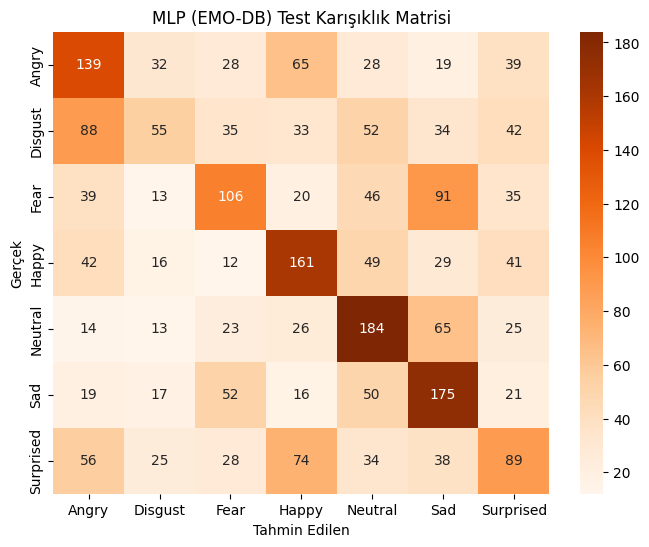

In [17]:
datasets = ['CREMA-D', 'CREMA-D_AUG', 'EMO-DB']
test_results = []

for dataset_name in datasets:
    print(f"\n{'='*20} {dataset_name} TEST AŞAMASI {'='*20}")
    try:
        # Kaydedilmiş verileri ve modelleri yükle
        X_test_selected = np.load(f'X_test_selected_{dataset_name}.npy')
        y_test = np.load(f'y_test_{dataset_name}.npy')
        le = joblib.load(f'label_encoder_{dataset_name}.pkl')

        lgbm = joblib.load(f'lgbm_model_{dataset_name}.pkl')
        svm = joblib.load(f'svm_model_{dataset_name}.pkl')
        mlp = joblib.load(f'mlp_model_{dataset_name}.pkl')

        # Modelleri değerlendir
        lgbm_acc, lgbm_f1, lgbm_pre, lgbm_rec = evaluate_model(lgbm, X_test_selected, y_test, 'LightGBM', dataset_name, le)
        svm_acc, svm_f1, svm_pre, svm_rec = evaluate_model(svm, X_test_selected, y_test, 'SVM', dataset_name, le)
        mlp_acc, mlp_f1, mlp_pre, mlp_rec = evaluate_model(mlp, X_test_selected, y_test, 'MLP', dataset_name, le)

        # Sonuçları kaydet
        test_results.append({
            'Model': ['LightGBM', 'SVM', 'MLP'],
            'Accuracy': [lgbm_acc, svm_acc, mlp_acc],
            'F1-Score': [lgbm_f1, svm_f1, mlp_f1],
            'Precision': [lgbm_pre, svm_pre, mlp_pre],
            'Recall': [lgbm_rec, svm_rec, mlp_rec],
            'Dataset': [dataset_name] * 3
        })
    except FileNotFoundError as e:
        print(f'HATA: {dataset_name} için gerekli dosyalar bulunamadı. Lütfen eğitim notebookunun çalıştığından emin olun.')
        print(f'Eksik dosya: {e.filename}')


## 4. Test Sonuçlarının Karşılaştırılması

Tüm modellerin test seti üzerindeki doğruluk (accuracy) ve F1-skoru metrikleri, veri setlerine göre gruplanarak çubuk grafikler halinde karşılaştırılır.

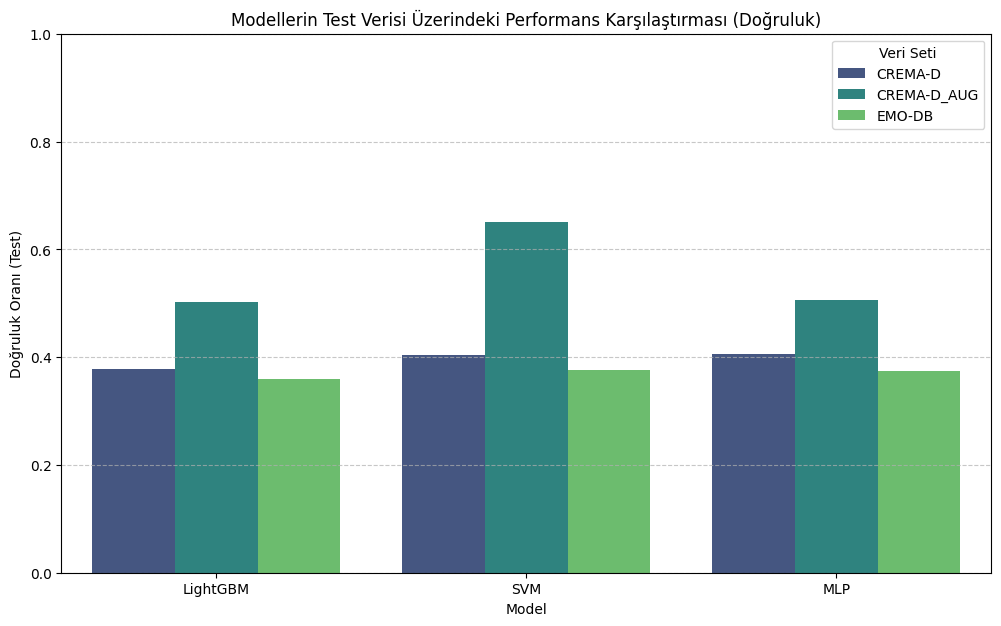

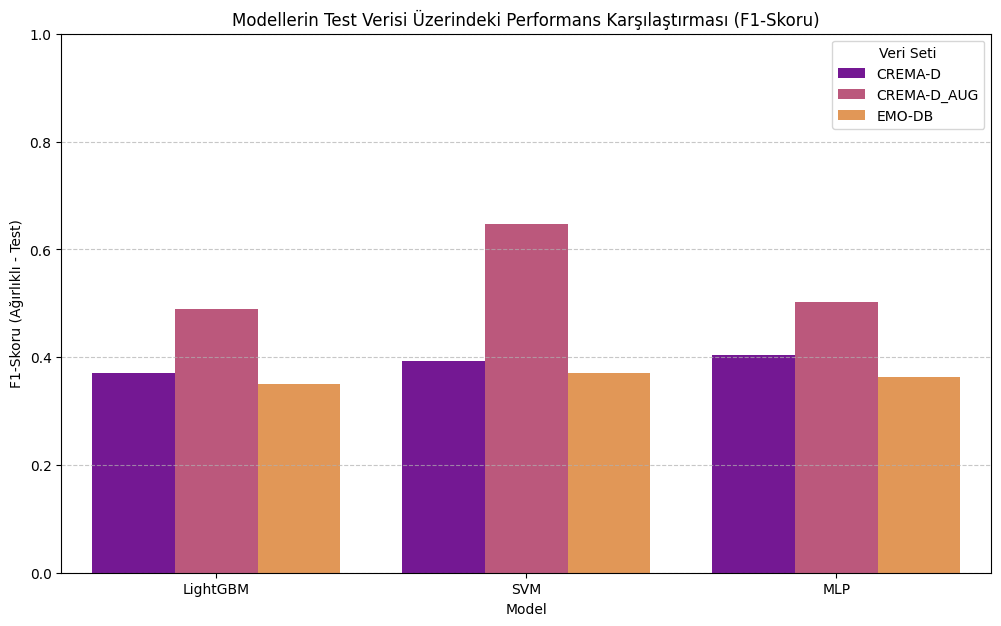

In [18]:
if test_results:
    results_df = pd.concat([pd.DataFrame(r) for r in test_results], ignore_index=True)

    # Doğruluk (Accuracy) Karşılaştırması
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=results_df, palette='viridis')
    plt.title('Modellerin Test Verisi Üzerindeki Performans Karşılaştırması (Doğruluk)')
    plt.ylabel('Doğruluk Oranı (Test)')
    plt.xlabel('Model')
    plt.legend(title='Veri Seti')
    plt.ylim(0, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # F1-Skoru Karşılaştırması
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Model', y='F1-Score', hue='Dataset', data=results_df, palette='plasma')
    plt.title('Modellerin Test Verisi Üzerindeki Performans Karşılaştırması (F1-Skoru)')
    plt.ylabel('F1-Skoru (Ağırlıklı - Test)')
    plt.xlabel('Model')
    plt.legend(title='Veri Seti')
    plt.ylim(0, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Karşılaştırılacak test sonucu bulunamadı. Lütfen önceki hücrelerin doğru çalıştığından emin olun.")
